In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
# Laoding the data

In [ ]:
ds_train, ds_test = tfds.load(
    'emnist/letters',
    split=['train', 'test'],
    as_supervised=True
)



In [ ]:
for images, labels in ds_train.take(1):
    print(images.shape)
    print(labels.shape)


(28, 28, 1)
()


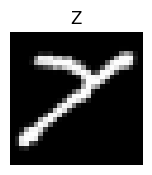

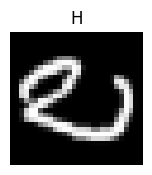

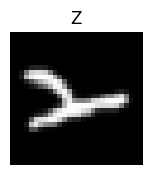

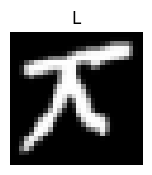

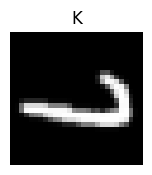

In [ ]:


for image, label in tfds.as_numpy(ds_train.take(5)):
    plt.figure(figsize=(10,10))
    plt.subplot(5,5,1)
    plt.imshow(image, cmap='gray')
    plt.title(chr(label + ord('A')))
    plt.axis('off')
    plt.show()



In [ ]:
## Image preprocessing

In [ ]:
def preprocess(image, label):
    
    image = tf.transpose(image, perm=[1, 0, 2])   
    image = tf.cast(image, tf.float32) / 255.0
    label = label - 1

    return image, label



In [ ]:
ds_train = ds_train.map(preprocess).shuffle(10000).batch(128)
ds_test  = ds_test.map(preprocess).batch(128)


(128, 28, 28, 1)


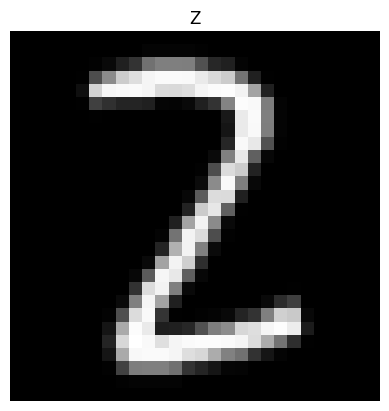

(128, 28, 28, 1)


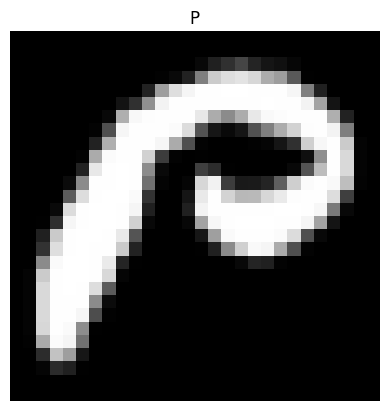

(128, 28, 28, 1)


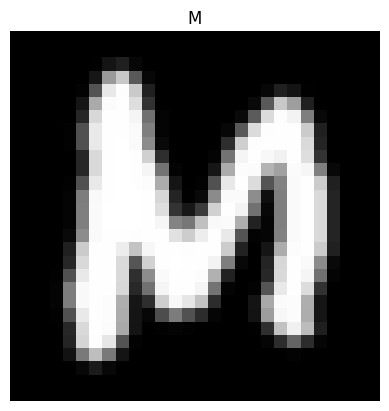

In [ ]:
for images, labels in ds_train.take(3):
    print(images.shape)  )
    plt.imshow(images[0].numpy().squeeze(), cmap='gray')
    plt.title(chr(labels[0].numpy() + ord('A')))
    plt.axis('off')
    plt.show()


In [ ]:
ds_train

<_BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
# Model Building

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(26,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,098 (887.10 KB)

 Trainable params: 227,098 (887.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    ds_train,
    epochs=20,
    validation_data=ds_test
)


Epoch 1/20
694/694 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.6830 - loss: 1.0759 - val_accuracy: 0.8767 - val_loss: 0.3858
Epoch 2/20
694/694 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8969 - loss: 0.3152 - val_accuracy: 0.9049 - val_loss: 0.3001
Epoch 3/20
694/694 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9190 - loss: 0.2421 - val_accuracy: 0.9064 - val_loss: 0.2846
Epoch 4/20
694/694 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9310 - loss: 0.2049 - val_accuracy: 0.9130 - val_loss: 0.2597
Epoch 5/20
694/694 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9373 - loss: 0.1804 - val_accuracy: 0.9122 - val_loss: 0.2593
Epoch 6/20
694/694 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9423 - loss: 0.1621 - val_accuracy: 0.9189 - val_loss: 0.2482
Epoch 7/20
694/694 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9493 - loss: 0.1410 - val_accuracy: 0.9119 - val_loss: 0.2723
Epoch 8/20
694/694 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9519 - loss: 0.1291 - val_accuracy: 

In [ ]:
# Model Evaluation

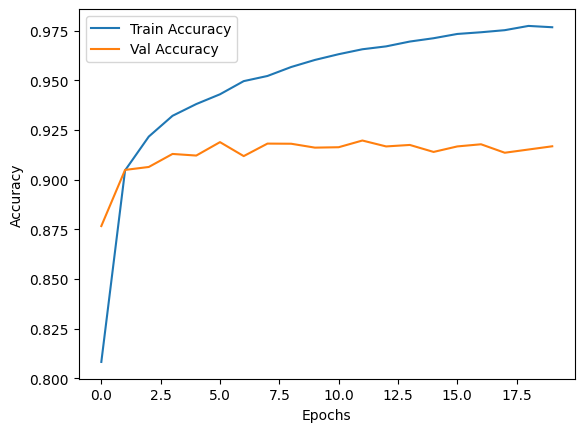

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  


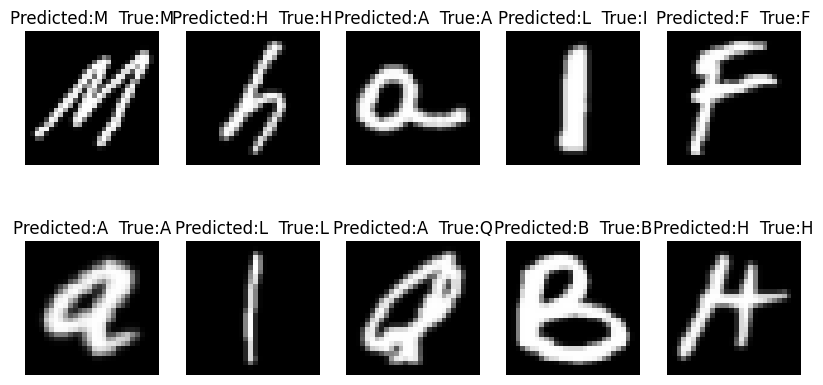

In [ ]:
for images, labels in ds_test.take(1):
    predictions = model.predict(images)
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
        predicted = np.argmax(predictions[i])
        actual = labels[i].numpy()
        plt.title(f"Predicted:{chr(predicted + ord('A'))}  True:{chr(actual + ord('A'))}")
        plt.axis('off')

    plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_true = []
y_pred = []
for images, labels in ds_test:
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(labels.numpy())

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━

In [ ]:
cm = confusion_matrix(y_true, y_pred)


In [ ]:
import seaborn as sns

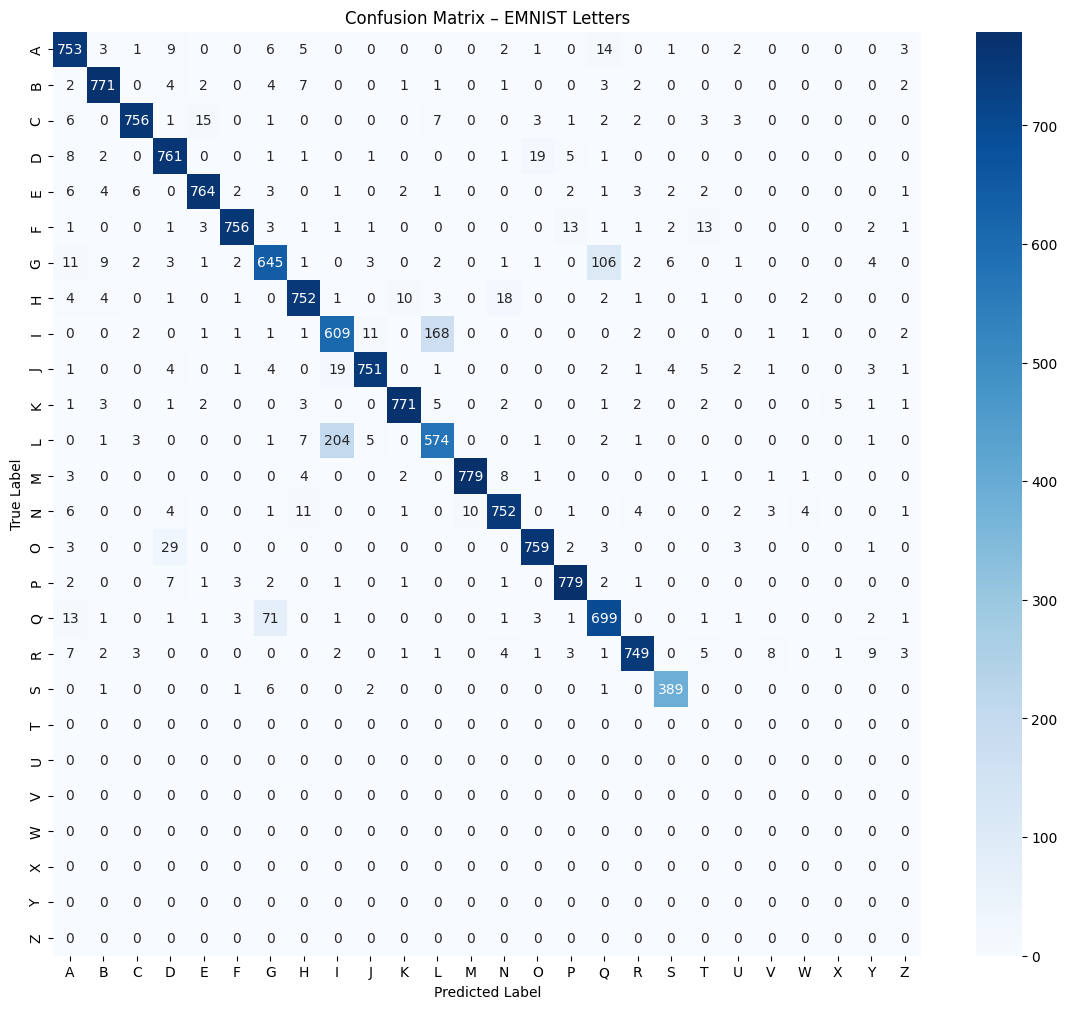

In [ ]:
plt.figure(figsize=(14, 12))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=[chr(i + ord('A')) for i in range(26)],
    yticklabels=[chr(i + ord('A')) for i in range(26)]
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – EMNIST Letters")
plt.show()


In [ ]:
model.save("emnist_letters_cnn3.keras")
